**ЛАБОРАТОРНА РОБОТА №4**

**1. Вирішіть завдання класифікації даних, з якими ви працювали в лабораторній No 2 за допомогою
повнозв’язаної нейромережі прямого поширення (fully connected feed-forward network).**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
import os

path:  /content/drive/MyDrive/chest_xray/train/NORMAL / IM-0523-0001-0001.jpeg


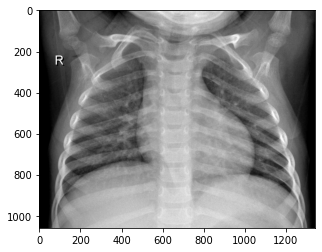

In [3]:
DATA_train_DIR = "/content/drive/MyDrive/chest_xray/train/"
CATEGORIES = ["NORMAL", 'PNEUMONIA']
for category in CATEGORIES:
    path = os.path.join(DATA_train_DIR, category) # path to NORMAL or PNEUMONIA dir
    for img in os.listdir(path): # We are iterating over all images
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) / 255.0 # Convert images to array using cv2
        plt.imshow(img_array, cmap = 'gray')
        print('path: ', path, '/', img)
        plt.show()
        break
    break

In [4]:
print('Shape: ', img_array.shape)

Shape:  (1059, 1342)


path:  /content/drive/MyDrive/chest_xray/train/NORMAL / IM-0523-0001-0001.jpeg


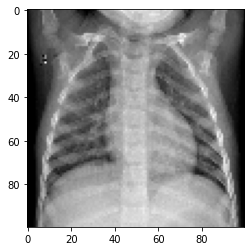

In [5]:
IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
print('path: ', path, '/', img)
plt.show()

In [6]:
print('Shape: ', new_array.shape)

Shape:  (100, 100)


In [7]:
new_array_df = pd.DataFrame(new_array)
#new_array_df = new_array_df.rename(columns={})
new_array_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.058674,0.148297,0.197410,0.203210,0.211824,0.263712,0.401158,0.471039,0.411312,0.414751,0.408930,0.598058,0.250250,0.296914,0.281098,0.289567,0.301468,0.314535,0.301353,0.318298,0.266902,0.270096,0.173695,0.046066,0.077723,0.040747,0.000000,0.000000,0.000000,0.033882,0.038412,0.089415,0.333540,0.553238,0.604141,0.602484,0.596071,0.615765,0.656002,0.666696,...,0.863353,0.771100,0.823000,0.872911,0.804751,0.811651,0.852769,0.629505,0.608473,0.566564,0.521450,0.371131,0.226797,0.254797,0.069628,0.154346,0.236510,0.300171,0.321614,0.313981,0.318815,0.319972,0.322143,0.336015,0.324626,0.320620,0.545057,0.512873,0.484803,0.522992,0.530514,0.502961,0.296852,0.291906,0.310759,0.265265,0.265579,0.230609,0.187327,0.119443
1,0.047297,0.144657,0.177289,0.210776,0.221217,0.278103,0.269988,0.462610,0.417819,0.409356,0.415524,0.562182,0.291333,0.305205,0.296724,0.299790,0.321130,0.325316,0.302202,0.316287,0.278393,0.245594,0.187836,0.119902,0.109334,0.091771,0.040627,0.000000,0.056195,0.054843,0.116323,0.150756,0.188672,0.330708,0.547770,0.635405,0.611227,0.602789,0.594649,0.594417,...,0.810146,0.773258,0.800377,0.768603,0.782479,0.827062,0.679480,0.647889,0.606767,0.542363,0.451213,0.392742,0.179339,0.160824,0.136967,0.182529,0.278118,0.347969,0.323569,0.338808,0.356356,0.325297,0.321098,0.307899,0.311873,0.502022,0.609340,0.482353,0.472354,0.484285,0.510784,0.403529,0.310349,0.313639,0.325345,0.321130,0.250561,0.218098,0.182245,0.144601
2,0.051042,0.124174,0.176176,0.215824,0.215599,0.291626,0.258895,0.445000,0.443023,0.423976,0.431709,0.435216,0.488897,0.325299,0.291107,0.317880,0.317726,0.313863,0.328673,0.305254,0.307276,0.239311,0.244456,0.237731,0.151383,0.100216,0.056577,0.021015,0.148507,0.129216,0.066825,0.201468,0.209309,0.227797,0.328137,0.527038,0.635229,0.609608,0.574974,0.576373,...,0.889755,0.782182,0.768529,0.790820,0.832180,0.750662,0.669327,0.627681,0.591247,0.499529,0.447807,0.380095,0.260990,0.077713,0.109008,0.270776,0.335515,0.342647,0.368690,0.363504,0.361232,0.350378,0.324706,0.315200,0.307758,0.507557,0.539032,0.477059,0.480922,0.507513,0.544910,0.320417,0.313294,0.324360,0.303038,0.321148,0.282662,0.223137,0.189563,0.117611
3,0.045859,0.117957,0.190340,0.206275,0.234353,0.267805,0.262196,0.526488,0.430463,0.448182,0.411974,0.412675,0.531882,0.312627,0.296977,0.319206,0.326553,0.324340,0.325490,0.301443,0.273668,0.298510,0.264731,0.222576,0.230937,0.165578,0.104110,0.156252,0.168561,0.161158,0.189255,0.183608,0.225634,0.267610,0.277424,0.315066,0.501894,0.571142,0.610922,0.639098,...,0.792243,0.787499,0.807074,0.844901,0.702414,0.674548,0.653793,0.624797,0.501020,0.477933,0.406514,0.377874,0.216470,0.126176,0.216270,0.288011,0.402437,0.364143,0.369227,0.369556,0.363601,0.354942,0.340068,0.311113,0.453946,0.498051,0.497128,0.518627,0.501362,0.524601,0.544017,0.317204,0.301630,0.324578,0.316589,0.336580,0.302763,0.237621,0.183428,0.126883
4,0.036157,0.122805,0.167303,0.198406,0.241800,0.290196,0.255703,0.512568,0.443261,0.415262,0.439966,0.427698,0.491907,0.457780,0.356437,0.318820,0.325042,0.311368,0.308811,0.295847,0.324638,0.304455,0.305549,0.283806,0.231373,0.218745,0.153904,0.240585,0.196822,0.235838,0.244296,0.219034,0.252140,0.310307,0.312115,0.326882,0.326059,0.409485,0.555915,0.567552,...,0.811028,0.816390,0.791162,0.677857,0.711109,0.696934,0.598262,0.520639,0.452833,0.388667,0.395646,0.258947,0.226670,0.249217,0.258216,0.398431,0.367786,0.352825,0.391193,0.372420,0.340119,0.346559,0.341793,0.335661,0.464059,0.526086,0.497509,0.509127,0.522840,0.585509,0.517837,0.316895,0.305682,0.313890,0.312236,0.317183,0.306367,0.237453,0.220345,0.137323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [8]:
# Create training data:
training_data = []
training_data_img_X = []
training_data_img_Y = []
def create_training_data():
    i = 0
    for category in CATEGORIES:
        path = os.path.join(DATA_train_DIR, category) # path to NORMAL or PNEUMONIA dir
        class_num = CATEGORIES.index(category) # 0 it is NORMAL, 1 it is PNEUMONIA
        for img in os.listdir(path): # We are iterating over all images
            if (i < 1341 or (i > 1341 and i <= 2682)):
                try:
                    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) / 255.0 # Convert images to array using cv2
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    training_data.append([new_array, class_num])
                    training_data_img_X.append(new_array)
                    training_data_img_Y.append(class_num)
                    i += 1
                except Exception as exc: # if some images are broken
                    pass
            else:
               i += 1
create_training_data()

In [9]:
print(len(training_data))

2682


In [10]:
# We need to shuffle the data, because all 0 go first and then all 1
import random
random.shuffle(training_data)
# Check it out:
i = 0
for sample in training_data:
    if (i < 10):
        print(sample[1])
        i += 1
    else: break

1
0
1
0
0
1
1
1
1
1


In [11]:
# As our images are stored as an array, we need to reduce the dimension
i = 0
for features in training_data:
    features[0] = features[0].flatten()
    if (i < 5):
        print(features[0])
        i += 1

[0.22219608 0.23286275 0.23160784 ... 0.         0.         0.25091427]
[0. 0. 0. ... 0. 0. 0.]
[0.13968627 0.17396391 0.21607843 ... 0.05490196 0.05490196 0.05490196]
[0.22672784 0.20135451 0.32295691 ... 0.         0.         0.        ]
[0.         0.         0.         ... 0.01317887 0.         0.        ]


In [12]:
X_train = []
Y_train = []
for features, label in training_data:
    X_train.append(features)
    Y_train.append(label)

In [13]:
# Create testing data:
testing_data = []
testing_data_img_X = []
testing_data_img_Y = []
DATA_test_DIR = "/content/drive/MyDrive/chest_xray/test/"
def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(DATA_test_DIR, category) # path to NORMAL or PNEUMONIA dir
        class_num = CATEGORIES.index(category) # 0 it is NORMAL, 1 it is PNEUMONIA
        for img in os.listdir(path): # We are iterating over all images
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) / 255.0 # Convert images to array using cv2
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                testing_data.append([new_array, class_num])
                testing_data_img_X.append(new_array)
                testing_data_img_Y.append(class_num)
            except Exception as exc: # if some images are broken
                pass
create_testing_data()

In [14]:
print(len(testing_data))

624


In [15]:
# We need to shuffle the data, because all 0 go first and then all 1
import random
random.shuffle(testing_data)
# Check it out:
i = 0
for sample in testing_data:
    if (i < 10):
        print(sample[1])
        i += 1
    else: break

1
0
1
1
1
1
0
1
1
0


In [16]:
# As our images are stored as an array, we need to reduce the dimension
i = 0
for features in testing_data:
    features[0] = features[0].flatten()
    if (i < 5):
        print(features[0])
        i += 1

[0.         0.         0.00784314 ... 0.         0.         0.02221066]
[0.02352941 0.02352941 0.02352941 ... 0.0627451  0.06239181 0.0627451 ]
[0.17168627 0.18345098 0.17647059 ... 0.11372549 0.11764706 0.11764706]
[0.26015686 0.24415686 0.24023529 ... 0.11309767 0.01176471 0.01960784]
[0.         0.         0.99803922 ... 0.         0.         0.        ]


In [17]:
X_test = []
Y_test = []
for features, label in testing_data:
    X_test.append(features)
    Y_test.append(label)

In [18]:
# Create validation data:
validation_data = []
validation_data_img_X = []
validation_data_img_Y = []
DATA_validation_DIR = "/content/drive/MyDrive/chest_xray/val/"
def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(DATA_validation_DIR, category) # path to NORMAL or PNEUMONIA dir
        class_num = CATEGORIES.index(category) # 0 it is NORMAL, 1 it is PNEUMONIA
        for img in os.listdir(path): # We are iterating over all images (8+8=16)
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) / 255.0 # Convert images to array using cv2
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                validation_data.append([new_array, class_num])
                validation_data_img_X.append(new_array)
                validation_data_img_Y.append(class_num)
            except Exception as exc: # if some images are broken
                pass
create_testing_data()

In [19]:
print(len(validation_data))

16


In [20]:
# We need to shuffle the data, because all 0 go first and then all 1
import random
random.shuffle(validation_data)
# Check it out:
i = 0
for sample in validation_data:
    if (i < 10):
        print(sample[1])
        i += 1
    else: break

1
0
0
0
1
1
0
1
0
0


In [21]:
# As our images are stored as an array, we need to reduce the dimension
i = 0
for features in validation_data:
    features[0] = features[0].flatten()
    if (i < 5):
        print(features[0])
        i += 1

[0.         0.         0.         ... 0.18838314 0.05684124 0.03396235]
[0.00927059 0.4207294  0.29596078 ... 0.         0.         0.        ]
[7.35058873e-03 2.20164705e-01 2.52235291e-01 ... 3.92156863e-03
 3.29767956e-05 0.00000000e+00]
[0.00021961 0.07982744 0.05882353 ... 0.14498028 0.11928596 0.10578125]
[0.         0.01835294 0.0627451  ... 0.00784314 0.00784314 0.00784314]


In [22]:
X_val = []
Y_val = []
for features, label in validation_data:
    X_val.append(features)
    Y_val.append(label)

In [23]:
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
X_val_np = np.array(X_val)
Y_train_np = np.array(Y_train)
Y_test_np = np.array(Y_test)
Y_val_np = np.array(Y_val)

# направления PCA очень чувствительны к шкале данных => выполняем их стандартизацию (мат.ож.=0 :) => cov считать легче)
# fit_transform для вычисления эмп-го среднего (мат.ож.) a и стандартного отклонения std, а также последующей стандартизации по ним
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_train_np = SS.fit_transform(X_train_np)
X_train_pd = pd.DataFrame(X_train_np)
Y_train_pd = pd.DataFrame(Y_train_np, columns=['Type'])
All_lungs_TRAINdf_stand = pd.concat([X_train_pd, Y_train_pd], axis=1)

X_test_np = SS.transform(X_test_np) # also stand
X_test_pd = pd.DataFrame(X_test_np)
Y_test_pd = pd.DataFrame(Y_test_np, columns=['Type'])
All_lungs_TESTdf_stand = pd.concat([X_test_pd, Y_test_pd], axis=1)

X_val_np = SS.transform(X_val_np) # also stand
X_val_pd = pd.DataFrame(X_val_np)
Y_val_pd = pd.DataFrame(Y_val_np, columns=['Type'])
All_lungs_VALdf_stand = pd.concat([X_val_pd, Y_val_pd], axis=1)

#  ---- TEST and VAL together --- we don't need it, but okey ----
X_test_and_val_np = np.concatenate((X_test_np, X_val_np), axis=0)
Y_test_and_val_np = np.concatenate((Y_test_np, Y_val_np), axis=0)
X_test_and_val_pd = pd.DataFrame(X_test_and_val_np)
Y_test_and_val_pd = pd.DataFrame(Y_test_and_val_np, columns=['Type'])
All_lungs_ValTESTdf_stand = pd.concat([X_test_and_val_pd, Y_test_and_val_pd], axis=1)
#----------------------------------------------------------------

#  ------- We don't need All_lungs_df_stand too, but okey -------
X_stand_pd = X_train_pd.append(X_test_pd, ignore_index=True)
X_stand_pd = X_stand_pd.append(X_val_pd, ignore_index=True)
Y_stand_pd = Y_train_pd.append(Y_test_pd, ignore_index=True)
Y_stand_pd = Y_stand_pd.append(Y_val_pd, ignore_index=True)
All_lungs_df_stand = pd.concat([X_stand_pd, Y_stand_pd], axis=1)
#----------------------------------------------------------------

All_lungs_TRAINdf_stand

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,Type
0,0.149705,0.104433,0.009023,0.004645,-0.144725,-0.011656,-0.155300,-0.249076,-0.213460,-0.200357,-0.149539,-0.125030,-0.178078,-0.197600,-0.307084,-0.313396,-0.508727,-0.613148,-0.840289,-1.001876,-1.123574,-0.623419,-0.189764,-0.784362,-1.505899,-0.853916,-0.335609,-0.197256,0.067716,0.069797,0.041540,0.407909,0.313626,0.357510,0.323100,0.262909,0.385954,0.534593,0.380655,0.389847,...,0.096074,0.165740,0.229315,0.172825,0.231806,0.318820,0.512146,0.454130,0.426932,0.472449,0.419462,0.334659,0.245992,0.337461,0.398877,0.361011,0.234824,0.228069,0.156656,0.296401,0.220265,-0.167643,-0.019124,-0.208542,0.051301,0.364195,-0.103299,0.281225,-0.580710,-0.630929,-0.513855,-0.441543,-0.947642,-0.814021,-0.696992,-0.606792,-0.548122,-0.500836,1.220605,1
1,-0.932955,-1.041370,-1.128746,-1.220598,-1.320264,-1.421603,-1.508557,-1.562789,-1.629414,-1.646752,-1.688828,-1.698404,-1.717480,-1.726783,-1.717418,-1.707946,-1.689556,-1.675229,-1.661138,-1.641401,-1.610716,-1.571176,-1.552234,-1.531299,-1.505899,-1.482537,-1.483619,-1.490212,-1.523869,-1.573096,-1.637618,-1.718979,-1.816613,-1.955583,-2.106503,-2.285780,-2.477784,-2.673919,-2.879409,-3.065175,...,-0.374256,-0.458773,-0.119994,-0.076944,0.098556,-0.041324,-0.005501,-0.236304,0.193814,0.608283,0.745849,0.662276,0.565758,0.680584,0.536278,0.973247,0.509005,0.059499,0.363540,0.609515,0.715050,0.696194,0.831526,0.806553,0.669829,0.682047,0.572795,0.590224,0.610375,0.877678,0.402735,0.006709,-0.223373,-0.595957,-0.696992,-0.606792,-0.548122,-0.500836,-0.461817,0
2,-0.252328,-0.185379,-0.067265,-0.207202,-0.010940,-0.014097,-0.020780,3.729581,-0.128569,-0.091501,-0.182785,-0.273762,-0.310610,-0.272816,-0.418748,-0.009843,-0.122298,0.056375,0.118889,0.380543,0.803012,0.605082,-0.333859,-0.172863,-0.167594,-0.146503,-0.191167,-0.182421,-0.298735,-0.293680,-0.284379,-0.351064,-0.446193,-0.370812,-0.404036,-0.306197,-0.099830,-0.126980,-0.174160,-0.477501,...,0.430575,0.353957,0.390697,0.257787,0.281512,0.326862,0.382122,0.327453,0.484051,0.301666,0.361435,0.421074,0.366315,0.469661,0.473617,0.566553,0.689200,0.539252,0.487553,0.395635,0.339025,0.366077,-0.074166,0.745001,0.681760,-1.204932,-1.648601,-1.624871,-1.850243,-1.522134,-1.233568,-0.995831,-0.772916,-0.572600,-0.399594,-0.273948,-0.139499,-0.080214,-0.093691,1
3,0.171786,-0.050604,0.457773,0.705679,0.438200,0.394349,0.359700,0.778849,0.091659,0.213824,-0.344955,-0.526564,1.190154,1.597937,1.616367,1.518965,1.474851,0.866091,1.005221,1.028054,1.102501,1.564011,0.842708,0.947601,2.167103,1.836450,2.116810,1.761115,1.626153,1.771989,1.421950,0.631768,0.495904,0.632801,0.757817,0.922422,0.599211,0.264968,0.219381,0.018476,...,-0.138700,0.009932,-0.563382,-0.449819,-0.346284,-0.736576,-0.676825,-0.725347,-0.821174,-0.849396,-0.620029,-0.810852,-0.875751,-0.703113,-0.802779,-0.757716,-0.664608,-0.690817,-0.312874,-0.288610,-0.272994,-0.498531,-0.611721,-0.384998,-0.372091,-0.485225,0.117160,-0.011834,-0.488984,-0.684901,-0.919447,-1.039835,-0.953665,-0.814021,-0.696992,-0.606792,-0.548122,-0.500836,-0.461817,0
4,-0.932955,-1.041370,-1.128746,-1.220598,-1.320264,-1.421603,-1.508557,-1.562789,-1.629414,-1.646752,-1.688828,-1.698404,-1.717480,-1.726783,-1.717418,-1.707946,-1.689556,-1.675229,-1.661138,-1.641401,-1.610716,-1.571176,-1.552234,-1.269550,-0.310468,0.424975,0.379018,0.622315,0.515637,0.755852,0.821992,0.763175,1.729733,1.874545,1.243197,1.547589,1.544350,1.451685,1.520937,1.712880,...,-0.043819,0.193538,0.360831,0.290655,0.234757,0.132939,0.118957,0.086193,0.100965,0.074099,0.077882,0.183625,-0.051681,-0.341425,-0.037531,0.164613,-0.248510,-0.470433,-0.451064,-0.732182,-0.648182,-0.586719,-0.500379,-0.483026,-0.428328

In [24]:
from sklearn.decomposition import PCA # линейный метод (А НЕ ЛЮБОЙ ДАТАСЕТ линейный, but we will try)
PCA_ = PCA(n_components=0.95)
X_PCA_95_perc=PCA_.fit_transform(X_train_pd)
All_lungs_TRAINdf_stand_PCA=pd.DataFrame(data=X_PCA_95_perc)
All_lungs_TRAINdf_stand_PCA['Type']=All_lungs_TRAINdf_stand['Type']
All_lungs_TRAINdf_stand_PCA

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,Type
0,-29.118272,15.955259,11.392492,-11.698062,3.486550,-6.625568,-9.201525,-6.952504,8.629447,20.309994,-13.349734,-6.414137,-5.825007,-8.570770,-7.289850,-2.757738,0.929396,4.514923,7.913176,7.692544,10.547965,3.414942,-7.005812,4.332884,2.955832,-1.833545,2.261710,-8.442733,-3.573409,-2.020359,-0.647530,-8.913208,12.587289,-3.402996,4.883005,5.516678,-1.008644,-13.024084,-0.447126,0.249335,...,-0.667017,-0.847284,-0.079358,-0.931354,0.646937,-0.233765,-0.610944,-0.502458,1.037873,0.511456,1.573968,-3.284088,0.140538,-0.581036,0.074724,-1.113900,0.326512,-0.314628,-1.009636,0.581708,1.365027,-1.007441,1.067060,1.881909,1.494183,-0.150123,-0.297495,0.448884,0.865087,-0.859174,-0.908561,-0.773532,1.071631,1.479175,-0.351161,0.726705,0.247650,-1.386135,-0.465666,1
1,8.400826,-3.481644,-55.464072,-54.155115,11.686267,28.935550,-25.961154,6.181351,-26.939792,16.575969,29.627505,18.269511,-37.487222,-28.264824,-10.101024,2.125018,7.874582,-0.779638,-5.193616,-11.288798,1.020887,-5.272374,8.562809,-26.363732,-5.354008,-0.181724,1.254358,-1.411421,0.437070,2.246834,-6.539412,-2.608235,-0.922324,-5.389512,4.446125,14.746185,-4.884034,-0.776432,-4.010414,-8.299955,...,-2.304487,0.506870,-0.475373,0.706206,-0.019283,3.817153,-1.022206,0.928681,-0.867796,-0.665371,-0.046233,0.425036,1.349116,2.036359,-0.045806,-0.237796,-1.757906,0.422808,-0.415721,-0.399461,-0.817172,-0.254554,-0.076349,1.257024,-1.520187,0.975384,-0.944620,1.503295,0.055010,-2.283099,-0.411713,-2.283973,1.777508,0.456046,0.485860,-0.235098,1.575341,-1.392241,-0.104665,0
2,-33.676781,19.632177,-3.937696,4.626199,22.307303,-11.768913,-2.817589,1.343752,23.749543,3.173230,3.980628,9.223936,-13.597385,5.280130,-20.292601,7.340422,7.799627,1.445338,4.173029,-0.078396,-13.187224,-6.330708,3.136521,-3.887683,2.217822,-9.576840,11.769284,-4.458562,-3.378434,2.790610,4.817220,1.015771,-3.865113,-7.330671,-7.747621,-6.400259,-0.634971,3.564530,4.450573,-1.584828,...,1.240153,1.061097,-0.834052,-0.458825,0.330454,0.787335,0.297490,-0.395749,0.500206,0.991533,0.512691,-0.659911,1.237683,-0.537558,-0.764149,-0.472331,0.011921,-0.692961,0.137028,0.007318,0.433525,-0.318355,-0.002979,-0.735977,-0.258266,-0.180494,-0.912041,0.662839,1.466996,0.797554,0.168064,-0.931505,0.540711,-1.106356,0.058745,-0.954352,-0.098235,1.332383,-0.530675,1
3,26.663643,-17.364125,45.982648,22.255925,-3.438137,6.510404,1.828596,-7.804679,-13.273072,11.144459,14.079126,-4.163757,-10.976281,5.522302,-12.804609,-2.004459,5.960080,12.442819,3.154530,-15.645118,-0.931580,2.946392,0.967584,-0.500571,4.340349,-7.852759,2.594034,-4.454459,0.575626,14.542946,-1.042990,1.730558,1.328018,0.364612,-0.247071,-1.108443,2.168720,-6.580893,-3.689015,-0.645878,...,-0.431696,-0.971492,-0.359107,-0.556010,-1.266639,1.457371,0.769542,-0.110797,2.060649,1.031195,0.588300,2.256748,0.036846,-0.193871,-2.015339,0.830226,0.443865,-0.023516,1.036357,-0.131270,1.054738,-0.390385,1.133751,-0.039265,0.100689,1.492725,-0.050747,-0.512745,0.266778,0.392693,-0.296860,-0.531789,-0.491554,0.395253,-0.405551,-1.515656,-0.186948,0.987136,-0.998641,0
4,26.770145,-13.009196,-25.948824,-13.538330,1.613987,36.923169,-0.654694,-10.017215,-23.339157,31.360436,-8.641762,-6.041298,-10.787502,5.614577,8.269085,-3.616881,-6.810766,-17.617038,-0.050206,-7.402988,-16.139453,1.441568,-0.985546,1.688230,1.530601,-15.588032,3.930086,2.327247,0.652850,4.626449,6.390580,-2.588163,-0.099303,-1.891221,-2.623331,-11.207137,-4.014624,-2.878082,-5.170579,-1.777935,...,-0.596350,-0.685732,0.073235,1.806756,-1.228287,-2.057502,-0.501683,1.413292,0.027318,-0.777050,0.665371,-0.951344,0.701446,0.409798,0.195474,-0.773856,-0.267601,-0.989859,-0.851800,-0.316134,-1.090498,1.142385,-0.831263,-0.781373

In [25]:
num_features = len(All_lungs_TRAINdf_stand_PCA.columns) - 1
num_features

589

In [26]:
X_train_PCA_pd = All_lungs_TRAINdf_stand_PCA.drop('Type', axis=1)
X_train_PCA_np = X_train_PCA_pd.to_numpy().astype('float32')
Y_train_PCA_pd = All_lungs_TRAINdf_stand_PCA['Type']
Y_train_PCA_np = Y_train_PCA_pd.to_numpy().astype('float32')

# X_val_PCA - ?, Y_val_PCA - ?, num_features = 585
X_val_585=PCA_.transform(X_val_pd)
All_lungs_VALdf_stand_PCA=pd.DataFrame(data=X_val_585)
All_lungs_VALdf_stand_PCA['Type']=All_lungs_VALdf_stand['Type']

X_val_PCA_pd = All_lungs_VALdf_stand_PCA.drop('Type', axis=1)
X_val_PCA_np = X_val_PCA_pd.to_numpy().astype('float32')
Y_val_PCA_pd = All_lungs_VALdf_stand_PCA['Type']
Y_val_PCA_np = Y_val_PCA_pd.to_numpy().astype('float32')

# X_test_PCA - ?, Y_test_PCA - ?, num_features = 585
X_test_585=PCA_.transform(X_test_pd)
All_lungs_TESTdf_stand_PCA=pd.DataFrame(data=X_test_585)
All_lungs_TESTdf_stand_PCA['Type']=All_lungs_TESTdf_stand['Type']

X_test_PCA_pd = All_lungs_TESTdf_stand_PCA.drop('Type', axis=1)
X_test_PCA_np = X_test_PCA_pd.to_numpy().astype('float32')
Y_test_PCA_pd = All_lungs_TESTdf_stand_PCA['Type']
Y_test_PCA_np = Y_test_PCA_pd.to_numpy().astype('float32')

In [27]:
from tensorflow import keras
from keras import layers, regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras.utils.np_utils import to_categorical
# 2 because 0 or 1
Y_train = to_categorical(Y_train_PCA_np, 2) 
Y_test = to_categorical(Y_test_PCA_np, 2)
Y_val = to_categorical(Y_val_PCA_np, 2) 

In [28]:
# we use LeakyReLU and ELU because we have values <0 (ELU is better than LeakyReLU)
# 512 - just because I want
model = Sequential()
# First layer
model.add(Dense(512, activation = 'selu', kernel_initializer = 'lecun_normal', 
                kernel_regularizer = regularizers.l2(1e-5), input_shape=(num_features,), input_dim = Y_train.shape[1]))
model.add(BatchNormalization()) # we don't need this because of the SELU structure, but for our confidence we will use the BatchNormalization
model.add(Dropout(0.5))
# Second layer
model.add(Dense(256, activation = 'elu', kernel_initializer = 'he_normal', 
                kernel_regularizer = regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Output layer
model.add(Dense(2, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_PCA_np, Y_train, steps_per_epoch = 8, epochs=10, batch_size=90, validation_split=0.2, verbose = 2)
# we take 0.1 of all train data as valid data because the power of the validation data from the auther is very small (only 16)
#history = model.fit(X_train_PCA_np, Y_train, epochs=10, batch_size=90, validation_data=(X_val_PCA_np, Y_val), verbose = 2)

Epoch 1/10
8/8 - 3s - loss: 0.6253 - accuracy: 0.7514 - val_loss: 0.4238 - val_accuracy: 0.9088 - 3s/epoch - 381ms/step
Epoch 2/10
8/8 - 0s - loss: 0.2614 - accuracy: 0.9250 - val_loss: 0.2842 - val_accuracy: 0.9385 - 83ms/epoch - 10ms/step
Epoch 3/10
8/8 - 0s - loss: 0.2142 - accuracy: 0.9248 - val_loss: 0.2313 - val_accuracy: 0.9572 - 83ms/epoch - 10ms/step
Epoch 4/10
8/8 - 0s - loss: 0.1236 - accuracy: 0.9681 - val_loss: 0.2256 - val_accuracy: 0.9553 - 78ms/epoch - 10ms/step
Epoch 5/10
8/8 - 0s - loss: 0.1578 - accuracy: 0.9528 - val_loss: 0.2075 - val_accuracy: 0.9534 - 76ms/epoch - 9ms/step
Epoch 6/10
8/8 - 0s - loss: 0.1198 - accuracy: 0.9631 - val_loss: 0.1893 - val_accuracy: 0.9572 - 84ms/epoch - 11ms/step
Epoch 7/10
8/8 - 0s - loss: 0.0878 - accuracy: 0.9750 - val_loss: 0.1813 - val_accuracy: 0.9609 - 91ms/epoch - 11ms/step
Epoch 8/10
8/8 - 0s - loss: 0.0785 - accuracy: 0.9875 - val_loss: 0.1751 - val_accuracy: 0.9590 - 82ms/epoch - 10ms/step
Epoch 9/10
8/8 - 0s - loss: 0.0977

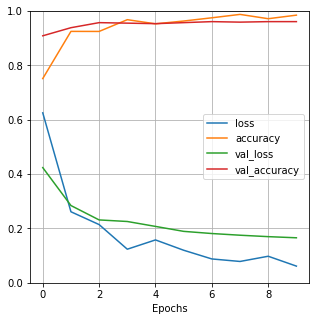

In [29]:
pd.DataFrame(history.history).plot(figsize=(5,5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0, 1]
plt.xlabel("Epochs")
plt.show()

In [30]:
pred_train = model.predict(X_train_PCA_np)
scores = model.evaluate(X_train_PCA_np, Y_train, verbose=0)
print('Accuracy on training data: ', scores[1])

pred_test = model.predict(X_test_PCA_np)
scores2 = model.evaluate(X_test_PCA_np, Y_test, verbose=0)
print('Accuracy on testing data: ', scores2[1])

Accuracy on training data:  0.9869500398635864
Accuracy on testing data:  0.8189102411270142


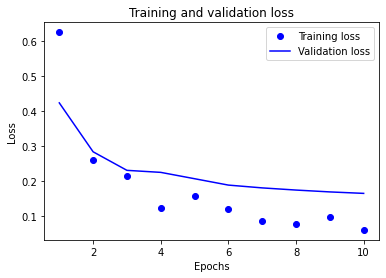

In [31]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**2. Вирішіть завдання класифікації зображень за допомогою згорткової (convolutional) нейромережі.**
(inspired by https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/)

In [32]:
IMG_SIZE = 224
images = []
labels =[]
for sub_dir in os.listdir(DATA_train_DIR):
    image_list=os.listdir(os.path.join(DATA_train_DIR,sub_dir))  #list of all image names in the directory
    image_list = list(map(lambda x:os.path.join(sub_dir,x),image_list))
    images.extend(image_list)
    labels.extend([sub_dir]*len(image_list)) 
train_data_df = pd.DataFrame({"Images":images,"Labels":labels})      
train_data_df = train_data_df.sample(frac=1).reset_index(drop=True) # To shuffle the data 
train_data_df = train_data_df.head(2680) # to take the subset of data (I'm taking 2680 from it)

images = []
labels =[]
for sub_dir in os.listdir(DATA_test_DIR):
    image_list=os.listdir(os.path.join(DATA_test_DIR,sub_dir))  #list of all image names in the directory
    image_list = list(map(lambda x:os.path.join(sub_dir,x),image_list))
    images.extend(image_list)
    labels.extend([sub_dir]*len(image_list)) 
test_data_df = pd.DataFrame({"Images":images,"Labels":labels})    
test_data_df = test_data_df.sample(frac=1).reset_index(drop=True) # To shuffle the data 
val_data_df = test_data_df.tail(33) # to take the subset of data (I'm taking 33 from it)
test_data_df = test_data_df.head(200) # to take the subset of data (I'm taking 200 from it)

In [33]:
from keras.preprocessing import image
datagen = image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip = False,
    shear_range = 0.2, # Shear Intensity (Shear angle in counter-clockwise direction in degrees)
    zoom_range = 0.2,) # Range for random zoom [1-zoom_range, 1+zoom_range]

train_data=datagen.flow_from_dataframe(
dataframe=train_data_df,
directory=DATA_train_DIR,
x_col="Images",
y_col="Labels",
batch_size=60,
seed=426,
shuffle=True,
class_mode="binary",
target_size = (IMG_SIZE, IMG_SIZE))

val_data=datagen.flow_from_dataframe(
dataframe=val_data_df,
directory=DATA_test_DIR,
x_col="Images",
y_col="Labels",
batch_size=10,
seed=426,
shuffle=True,
class_mode="binary",
target_size = (IMG_SIZE, IMG_SIZE))

test_data=datagen.flow_from_dataframe(
dataframe=test_data_df,
directory=DATA_test_DIR,
x_col="Images",
y_col="Labels",
batch_size=40,
seed=426,
shuffle=True,
class_mode="binary",
target_size = (IMG_SIZE, IMG_SIZE))

Found 2680 validated image filenames belonging to 2 classes.
Found 33 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


In [34]:
# ------------ We don't use it ------------
Y_train = train_data_df['Labels']
unique_vals = Y_train.unique()
Y_train.replace(to_replace=unique_vals, value=list(range(len(unique_vals))),inplace=True)
Y_train = to_categorical(Y_train, 2) 

Y_test = test_data_df['Labels']
unique_vals = Y_test.unique()
Y_test.replace(to_replace=unique_vals, value=list(range(len(unique_vals))),inplace=True)
Y_test = to_categorical(Y_test, 2) 

Y_val = val_data_df['Labels']
unique_vals = Y_val.unique()
Y_val.replace(to_replace=unique_vals, value=list(range(len(unique_vals))),inplace=True)
Y_val = to_categorical(Y_val, 2) 
# ------------------------------------------

In [35]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
model = Sequential()
# First conv block
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='selu', kernel_initializer = 'lecun_normal', 
                 padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3), input_dim = Y_train.shape[1],
                 kernel_regularizer = regularizers.l2(1e-7)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='selu', kernel_initializer = 'lecun_normal', 
                 padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.5)) # Because of theory on p. 468 I take 0.5 for CNN (recommendation: 0.4-05 for CNN, 20-30 for RNN)
# Second conv block
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_initializer = 'he_normal',
                  padding='same', kernel_regularizer = regularizers.l2(1e-6)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_initializer = 'he_normal',
                  padding='same', kernel_regularizer = regularizers.l2(1e-6)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.5))
# Third conv block
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='elu', kernel_initializer = 'he_normal',
                  padding='same', kernel_regularizer = regularizers.l2(1e-6)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='elu', kernel_initializer = 'he_normal',
                  padding='same', kernel_regularizer = regularizers.l2(1e-6)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.5))
# FC layer
model.add(Flatten())
model.add(Dense(512, activation='selu', kernel_initializer = 'lecun_normal', 
                kernel_regularizer = regularizers.l2(1e-5)))
model.add(Dropout(rate=0.5))
# Output layer
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1))
# Creating model and compiling
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
history_cnn = model.fit_generator(train_data, steps_per_epoch = 8, epochs = 10, validation_data = val_data, verbose = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
8/8 - 34s - loss: 11.7036 - accuracy: 0.2417 - val_loss: 9.3541 - val_accuracy: 0.3939 - 34s/epoch - 4s/step
Epoch 2/10
8/8 - 17s - loss: 11.7988 - accuracy: 0.2354 - val_loss: 9.3528 - val_accuracy: 0.3939 - 17s/epoch - 2s/step
Epoch 3/10
8/8 - 17s - loss: 11.2833 - accuracy: 0.2688 - val_loss: 9.3516 - val_accuracy: 0.3939 - 17s/epoch - 2s/step
Epoch 4/10
8/8 - 17s - loss: 11.5714 - accuracy: 0.2500 - val_loss: 9.3507 - val_accuracy: 0.3939 - 17s/epoch - 2s/step
Epoch 5/10
8/8 - 17s - loss: 11.5386 - accuracy: 0.2521 - val_loss: 9.3501 - val_accuracy: 0.3939 - 17s/epoch - 2s/step
Epoch 6/10
8/8 - 17s - loss: 11.3774 - accuracy: 0.2625 - val_loss: 9.3498 - val_accuracy: 0.3939 - 17s/epoch - 2s/step
Epoch 7/10
8/8 - 17s - loss: 11.5700 - accuracy: 0.2500 - val_loss: 9.3496 - val_accuracy: 0.3939 - 17s/epoch - 2s/step
Epoch 8/10
8/8 - 24s - loss: 11.1674 - accuracy: 0.2761 - val_loss: 9.3495 - val_accuracy: 0.3939 - 24s/epoch - 3s/step
Epoch 9/10
8/8 - 16s - loss: 11.6704 - a

**What if we will use VGG16?**

In [40]:
from keras.applications.vgg16 import VGG16
VGG16_model = VGG16()
VGG16_model.summary()

553476096/553467096 [==============================] - 8s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [41]:
# This is Model, not Sequential
type(VGG16_model)

keras.engine.functional.Functional

In [42]:
model = Sequential()
for layer in VGG16_model.layers:
    model.add(layer)
    
model.pop() # We don't need the last Dense layer because we have a binary classification

In [43]:
for layer in model.layers:
    layer.trainable = False # fix the layers as frozen and thus avoid training (only testing :) )

# First layer
model.add(Dense(512, activation = 'selu', kernel_initializer = 'lecun_normal', 
                kernel_regularizer = regularizers.l2(1e-5), input_shape=(num_features,), input_dim = Y_train.shape[1]))
model.add(BatchNormalization()) # we don't need this because of the SELU structure, but for our confidence we will use the BatchNormalization
model.add(Dropout(0.5))
# Second layer
model.add(Dense(256, activation = 'elu', kernel_initializer = 'he_normal', 
                kernel_regularizer = regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Third layer    
model.add(Dense(2, activation='sigmoid'))
# Fourth layer
model.add(Dense(1)) # Avoiding size conversions
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_vgg16 = model.fit_generator(train_data, steps_per_epoch = 8, epochs = 100, validation_data = val_data, verbose = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
8/8 - 37s - loss: 0.6290 - accuracy: 0.7292 - val_loss: 0.7588 - val_accuracy: 0.4242 - 37s/epoch - 5s/step
Epoch 2/100
8/8 - 26s - loss: 0.5225 - accuracy: 0.7826 - val_loss: 0.5097 - val_accuracy: 0.7576 - 26s/epoch - 3s/step
Epoch 3/100
8/8 - 15s - loss: 0.4364 - accuracy: 0.8417 - val_loss: 0.7265 - val_accuracy: 0.4545 - 15s/epoch - 2s/step
Epoch 4/100
8/8 - 14s - loss: 0.3780 - accuracy: 0.8391 - val_loss: 0.6036 - val_accuracy: 0.6667 - 14s/epoch - 2s/step
Epoch 5/100
8/8 - 15s - loss: 0.2389 - accuracy: 0.9271 - val_loss: 0.6082 - val_accuracy: 0.7879 - 15s/epoch - 2s/step
Epoch 6/100
8/8 - 15s - loss: 0.2478 - accuracy: 0.9167 - val_loss: 0.7947 - val_accuracy: 0.8182 - 15s/epoch - 2s/step
Epoch 7/100
8/8 - 15s - loss: 0.2782 - accuracy: 0.9000 - val_loss: 2.2441 - val_accuracy: 0.6061 - 15s/epoch - 2s/step
Epoch 8/100
8/8 - 15s - loss: 0.3424 - accuracy: 0.8958 - val_loss: 4.8701 - val_accuracy: 0.6061 - 15s/epoch - 2s/step
Epoch 9/100
8/8 - 15s - loss: 0.3009 - a

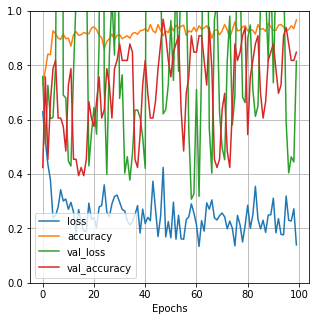

In [44]:
pd.DataFrame(history_vgg16.history).plot(figsize=(5,5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0, 1]
plt.xlabel("Epochs")
plt.show()

In [45]:
pred_train = model.predict_generator(train_data)
scores = model.evaluate(train_data, verbose=0)
print('Accuracy on training data: ', scores[1])

pred_test = model.predict_generator(test_data)
scores2 = model.evaluate(test_data, verbose=0)
print('Accuracy on testing data: ', scores2[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


Accuracy on training data:  0.9492537379264832


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


Accuracy on testing data:  0.8650000095367432
